### SC62421_Hastialisna Hurul Aeni Setiawan
Data: [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Input data
file_id = '1PXy6pJyNlZzSp8Bdijo_eEhu6hzI39vk'
url = f'https://drive.google.com/uc?id={file_id}'

raw_data = pd.read_csv(url)
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Variable Descriptions**
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment- Value 1: upsloping, Value 2: flat, Value 3: downsloping
* ca: number of major vessels (0–3) colored by flourosopy
* thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
* target: 1 = disease, 0 = no disease

In [ ]:
# Variable types
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categoric = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

### 1. Data Preparation

Peserta dapat memilih dataset yang telah disediakan.
Siapkan data berdasarkan langkah berikut:
* Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.
* Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.
* Outlier: Memeriksa outlier dan menangani outlier jika ada.
* Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.
* Feature encoding: Melakukan feature encoding jika diperlukan.

#### Missing value

In [ ]:
# Mencari missing value dari setiap kolom
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Duplicate value

In [ ]:
# Mencari duplicate value dari setiap kolom
raw_data[raw_data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Mengatasi duplicate value
df_clean = raw_data.drop_duplicates()
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
print('Jumlah data sebelum duplikat dihapus adalah:', len(raw_data))
print('Jumlah data duplikat adalah:', len(raw_data[raw_data.duplicated()]))
print('Sehingga jumlah data setelah duplikat dihapus adalah:', len(df_clean))

Jumlah data sebelum duplikat dihapus adalah: 1025
Jumlah data duplikat adalah: 723
Sehingga jumlah data setelah duplikat dihapus adalah: 302


#### Error value

In [ ]:
# Cek error value
df_clean.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Setelah memeriksa semua variabel, ditemukan bahwa thal dan ca memiliki kategori tambahan di masing-masing variabel. Akan diganti nilai-nilai ini dengan dengan nilai median. Imputasi dilakukan karena keterbatasan banyak dataset.

In [ ]:
# Handling error value
# Menampilkan data ca yang memiliki error value
tv_ca = [0,1,2,3]
df_clean[~df_clean['ca'].isin(tv_ca)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [ ]:
# Imputasi data
def imputasi_ca(x):
    if x in tv_ca:
        return x
    return df_clean['ca'].median()

df_clean['ca'] = df_clean['ca'].apply(imputasi_ca)
df_clean[~df_clean['ca'].isin(tv_ca)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Menampilkan data thal yang memiliki error value
tv_thal = [1,2,3]
df_clean[~df_clean['thal'].isin(tv_thal)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1


In [ ]:
# Imputasi data
def imputasi_thal(x):
    if x in tv_thal:
        return x
    return df_clean['thal'].median()

df_clean['thal'] = df_clean['thal'].apply(imputasi_thal)
df_clean.head()
df_clean[~df_clean['thal'].isin(tv_thal)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
print('Kolom ca sudah diatasi, dengan jumlah unik:', df_clean['ca'].nunique())
print('Kolom thal sudah diatasi, dengan jumlah unik:', df_clean['thal'].nunique())

Kolom ca sudah diatasi, dengan jumlah unik: 4
Kolom thal sudah diatasi, dengan jumlah unik: 3


#### Outlier value

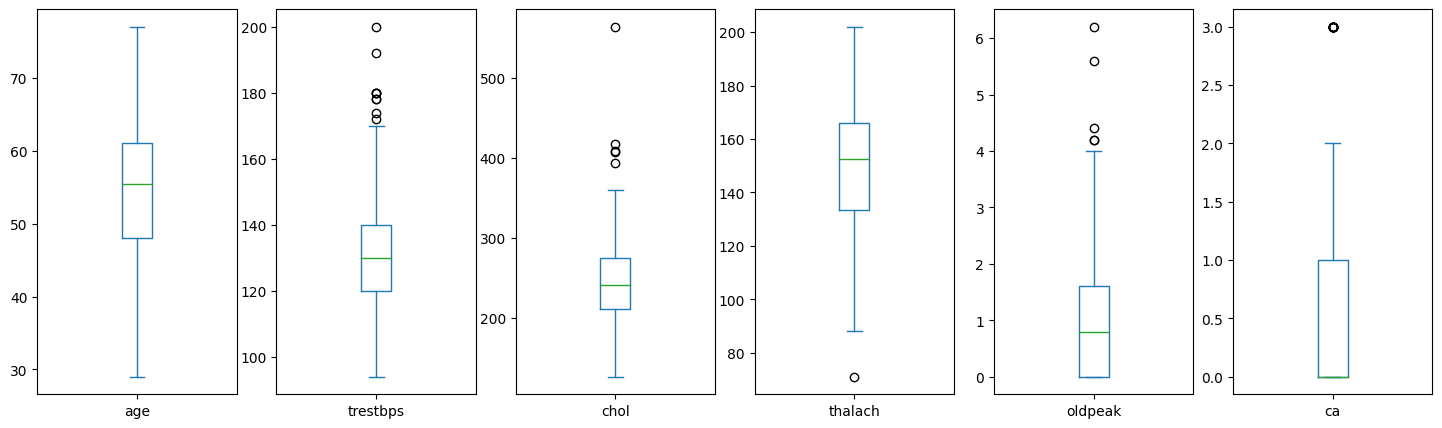

In [ ]:
# Mencari outlier data variabel numerik dengan menggunakan boxplot
df_clean[numeric].plot(subplots=True, kind='box', figsize=(18,5))
plt.show()


Dari visualisasi ini kita dapat melihat bahwa semua kolom numerik kecuali age memiliki outlier.

In [ ]:
# Menghitung nilai Q1, Q3, dan IQR
def quantile(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lowerbound = Q1-1.5*IQR
    upperbound = Q3+1.5*IQR
    return lowerbound, upperbound

In [ ]:
# Menampilkan data outlier
lowerbound,upperbound=quantile(df_clean, numeric)
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lowerbound = Q1-1.5*IQR
    upperbound = Q3+1.5*IQR
    return df[(df[col] < lowerbound) | (df[col] > upperbound)]

In [ ]:
detect_outliers(df_clean, 'trestbps')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0.0,2.0,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2.0,3.0,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0.0,2.0,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0.0,2.0,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1.0,3.0,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2.0,3.0,0
343,52,1,2,172,199,1,1,162,0,0.5,2,0.0,3.0,1
396,68,1,2,180,274,1,0,150,1,1.6,1,0.0,3.0,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0.0,3.0,1


In [ ]:
detect_outliers(df_clean, 'chol')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1.0,2.0,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0.0,3.0,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2.0,3.0,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0.0,2.0,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3.0,3.0,0


In [ ]:
detect_outliers(df_clean, 'thalach')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0.0,2.0,0


In [ ]:
detect_outliers(df_clean, 'oldpeak')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3.0,1.0,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3.0,3.0,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0.0,3.0,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3.0,3.0,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0.0,3.0,1


In [ ]:
detect_outliers(df_clean, 'ca')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3.0,1.0,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3.0,3.0,0
53,49,1,2,120,188,0,1,139,0,2.0,1,3.0,3.0,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3.0,3.0,0
81,49,1,2,118,149,0,0,126,0,0.8,2,3.0,2.0,0
154,63,1,0,130,330,1,0,132,1,1.8,2,3.0,3.0,0
160,77,1,0,125,304,0,0,162,1,0.0,2,3.0,2.0,0
185,57,1,0,165,289,1,0,124,0,1.0,1,3.0,3.0,0
194,67,1,0,160,286,0,0,108,1,1.5,1,3.0,2.0,0


Akan dilakukan penghapusan pada kolom trestbps, chol, thalach, dan oldpeak. Khusus untuk kolom ca tidak akan ditindaklanjuti, karena nilai outliers merupakan semua data bernilai 3. Ketika outliers dihapus khawatir akan mempengaruhi korelasi terhadap target disease.

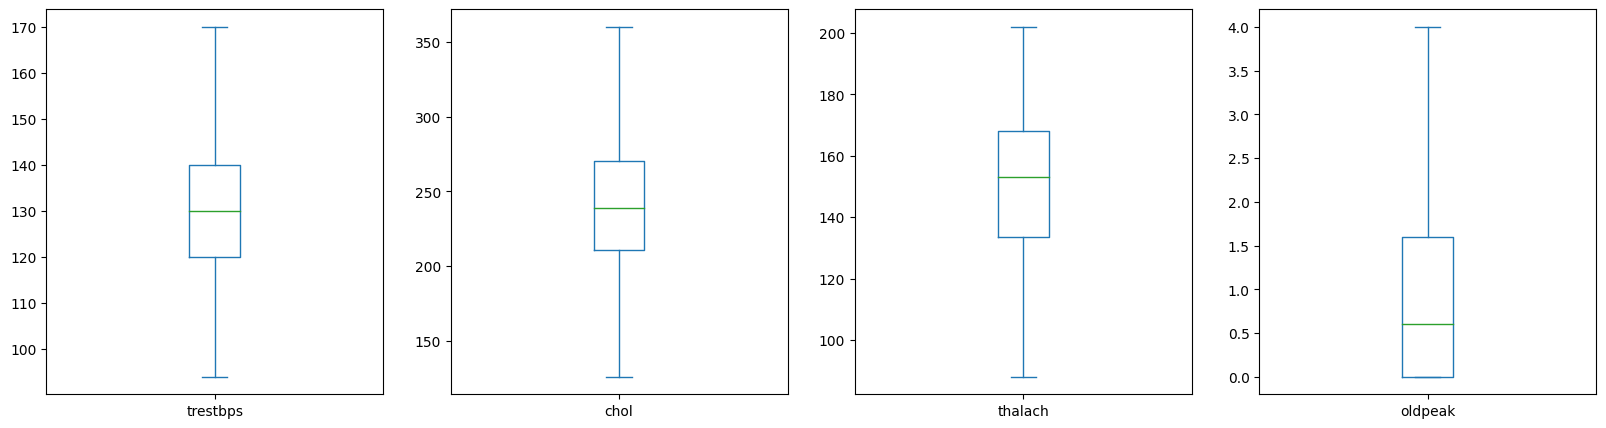

In [ ]:
# Menghapus outlier
outliers = ['trestbps', 'chol', 'thalach', 'oldpeak']
lowerbound1,upperbound1=quantile(df_clean, outliers)
df = df_clean[((df_clean[outliers] >= lowerbound1) & (df_clean[outliers] <= upperbound1)).all(axis='columns')]

# Menampilkan Boxplot yang outliernya sudah dihapus
df[outliers].plot(kind='box', subplots=True, figsize=(20,5))
plt.show()

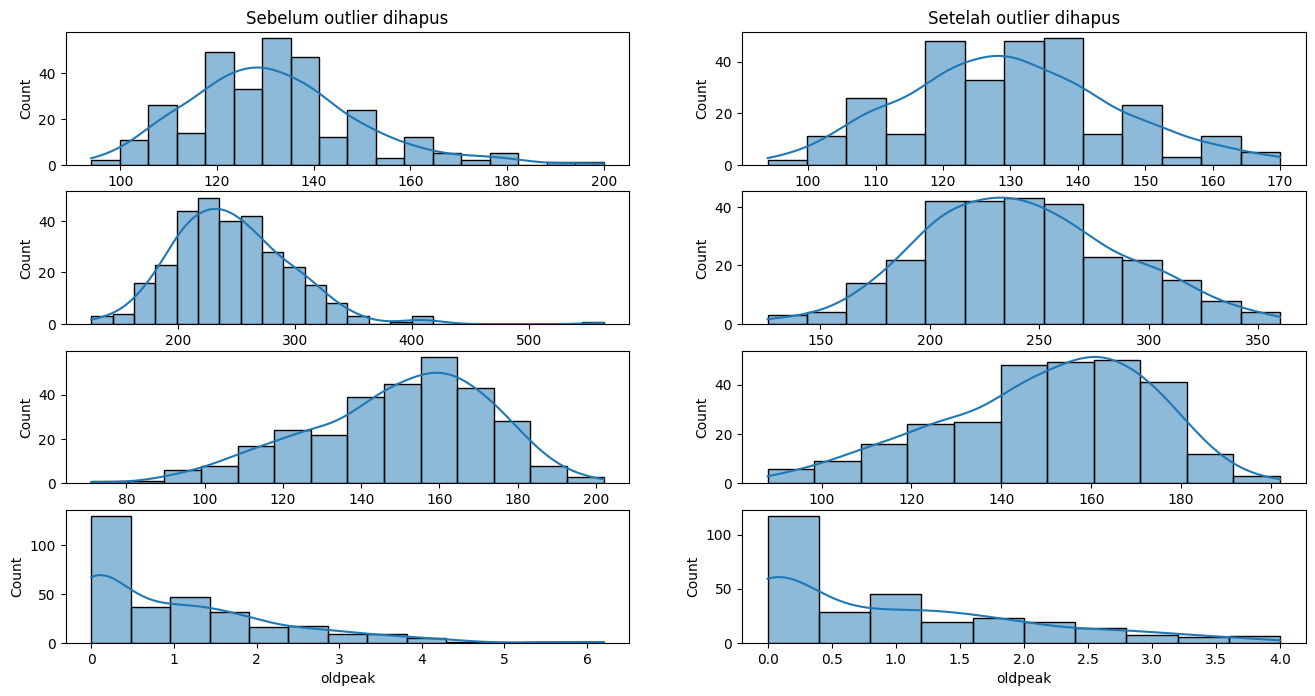

In [ ]:
# Perbandingan distribusi data sebelum dan setelah outlier dihapus
plt.figure(figsize=(16,10))
plt.subplot(5,2,1)
plt.title('Sebelum outlier dihapus')
sns.histplot(df_clean['trestbps'], kde=True)

plt.subplot(5,2,2)
plt.title('Setelah outlier dihapus')
sns.histplot(df['trestbps'], kde=True)

plt.subplot(5,2,3)
sns.histplot(df_clean['chol'], kde=True)

plt.subplot(5,2,4)
sns.histplot(df['chol'], kde=True)

plt.subplot(5,2,5)
sns.histplot(df_clean['thalach'], kde=True)

plt.subplot(5,2,6)
sns.histplot(df['thalach'], kde=True)

plt.subplot(5,2,7)
sns.histplot(df_clean['oldpeak'], kde=True)

plt.subplot(5,2,8)
sns.histplot(df['oldpeak'], kde=True)

plt.show()

#### Imbalance data

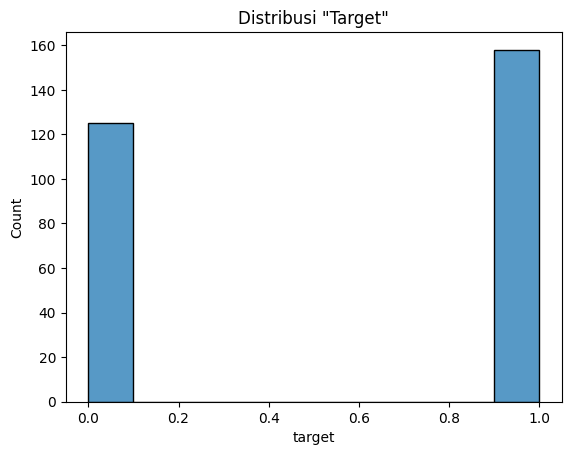

In [ ]:
# Cek imbalance data pada kolom 'Target'

sns.histplot(df['target'])
plt.title('Distribusi "Target"')
plt.show()

Karena kolom "Target" sudah cukup balance, maka tidak perlu handling imbalanced data.

#### Scaling

In [ ]:
# StandardScaler untuk data numerik
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled=df.copy()
df_scaled[numeric]=scaler.fit_transform(df[numeric])

df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,2,0.666667,3.0,0
1,0.500000,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0,0.000000,3.0,0
2,0.854167,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0,0.000000,3.0,0
3,0.666667,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,2,0.333333,3.0,0
4,0.687500,0,0,0.578947,0.717949,1,1,0.157895,0,0.475,1,1.000000,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.812500,0,2,0.342105,0.363248,0,0,0.236842,0,0.375,1,0.000000,2.0,1
733,0.312500,0,2,0.184211,0.064103,0,1,0.763158,0,0.150,1,0.000000,2.0,1
739,0.479167,1,0,0.447368,0.551282,0,1,0.640351,1,0.000,2,0.333333,3.0,0
843,0.625000,1,3,0.868421,0.628205,0,0,0.324561,0,0.000,2,0.000000,2.0,0


### 2. Exploratory Data Analysis

Menggunakan dataset yang sama, Peserta diminta untuk:
* Mengelaborasi features dan tipe data (nominal, ordinal, numerical)
* Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
* Menemukan dan mendeskripsikan statistical five summaries
* Mendeskripsikan distribusi data

#### Features dan tipe data

In [ ]:
# Pembagian feature berdasarkan tipe data

# Memperbaiki tipe data kategorik
df_fix_dtype = df.copy()
df_fix_dtype[categoric] = df_clean[categoric].astype(object)

# Membuat tabel feature
features = pd.DataFrame({'Features': df_fix_dtype.columns.to_list()})

def num_or_cat(x):
    if x in categoric:
        return 'Categorical'
    return 'Numeric'

features['Tipe data'] = features['Features'].apply(num_or_cat)

# Menampilkan tabel
features

,Features,Tipe data
0,age,Numeric
1,sex,Categorical
2,cp,Categorical
3,trestbps,Numeric
4,chol,Numeric
5,fbs,Categorical
6,restecg,Categorical
7,thalach,Numeric
8,exang,Categorical
9,oldpeak,Numeric


#### Statistical Five Summaries

In [ ]:
# Data numerik
df_fix_dtype.describe().T

,count,mean,std,min,25%,50%,75%,max
age,283.0,54.049470,9.128186,29.0,47.0,55.0,60.0,77.0
trestbps,283.0,129.883392,15.387795,94.0,120.0,130.0,140.0,170.0
chol,283.0,242.314488,44.654188,126.0,210.5,239.0,270.5,360.0
thalach,283.0,149.961131,22.691625,88.0,133.5,153.0,168.0,202.0
oldpeak,283.0,0.951943,1.026400,0.0,0.0,0.6,1.6,4.0
ca,283.0,0.639576,0.905532,0.0,0.0,0.0,1.0,3.0


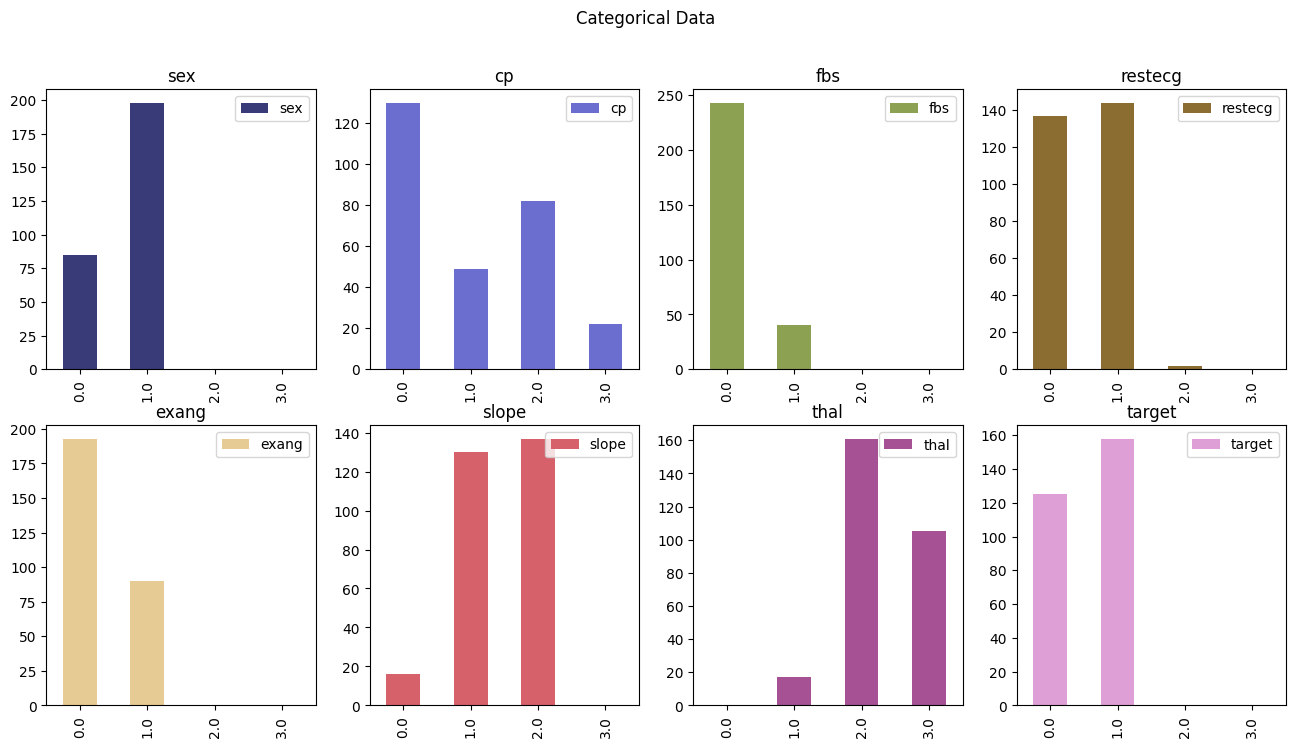

,sex,cp,fbs,restecg,exang,slope,thal,target
count,283,283,283,283,283,283,283.0,283
unique,2,4,2,3,2,3,3.0,2
top,1,0,0,1,0,2,2.0,1
freq,198,130,243,144,193,137,161.0,158


In [ ]:
# Data kategorik
df_fix_dtype[categoric].apply(pd.Series.value_counts).plot(
    kind = 'bar',
    subplots = True,
    sharex = False,
    layout = (2, 4),
    figsize = (16, 8),
    title = 'Categorical Data',
    style = 'dark_background',
    colormap = 'tab20b'
)
plt.show()

df_fix_dtype[categoric].describe()

#### Distribusi data

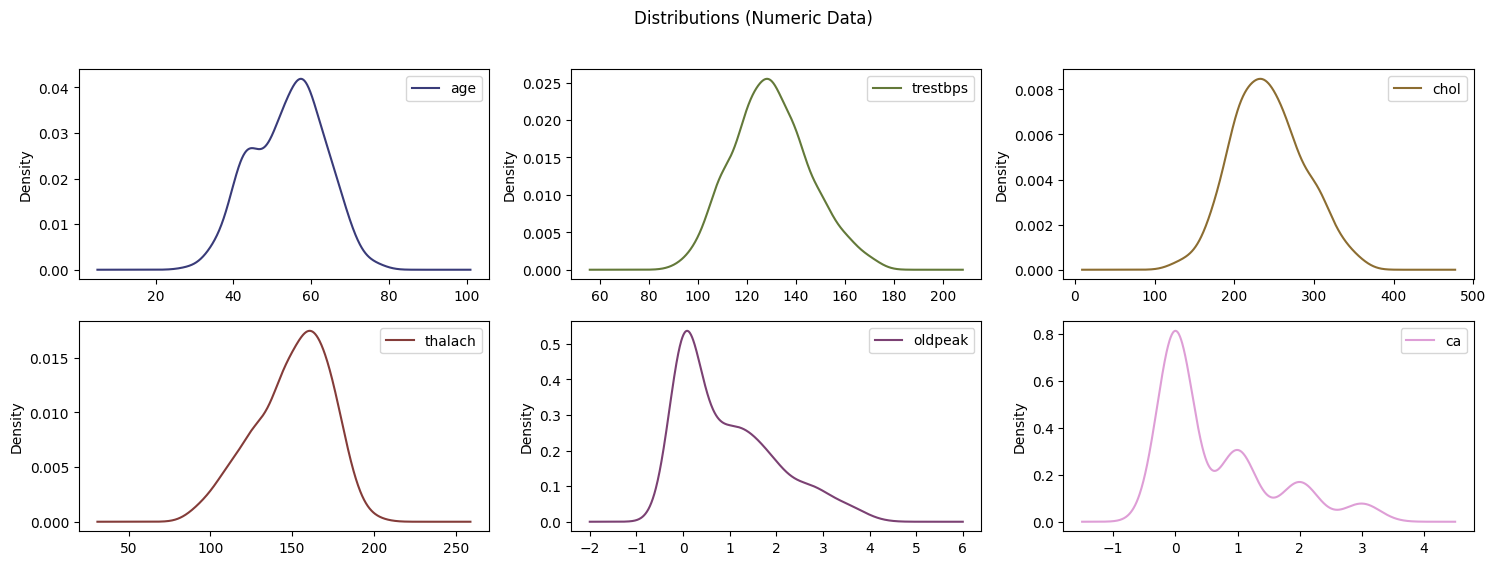

In [ ]:
df_fix_dtype[numeric].plot(
    title = 'Distributions (Numeric Data)',
    kind = 'density',
    subplots = True,
    layout = (2,3),
    sharex = False,
    ylabel = False,
    figsize = (18, 6),
    colormap = 'tab20b')
plt.show()

Distribusi variabel trestbps, chol, dan thalach adalah normal. Sedangkan, variabel age, oldpeak, dan ca tidak normal.

#### Bi-/Multivariate Analysis

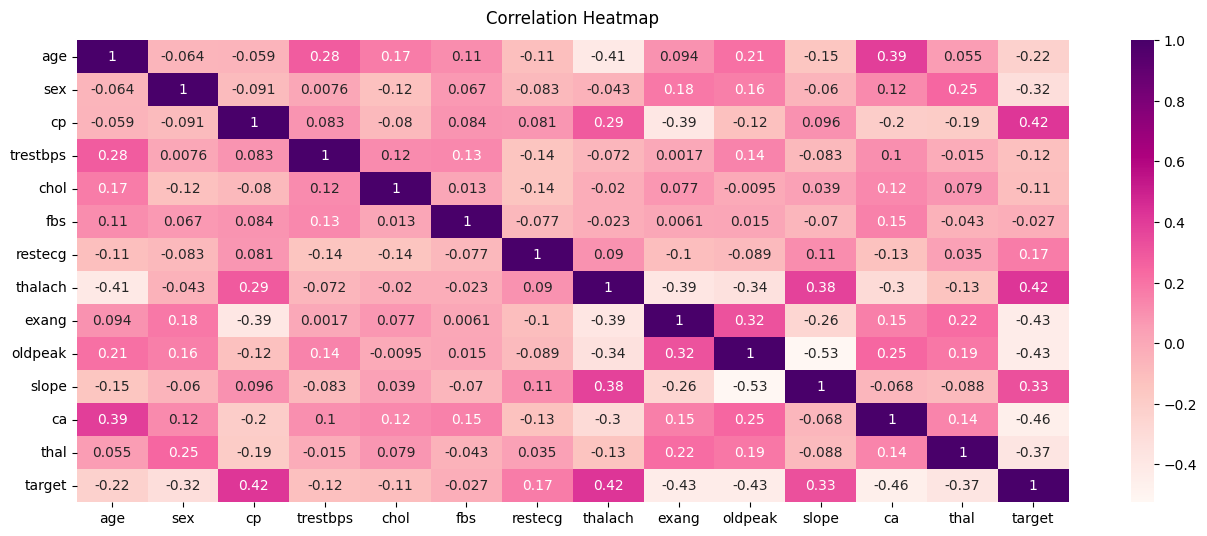

In [ ]:
# Menampilkan correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='RdPu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

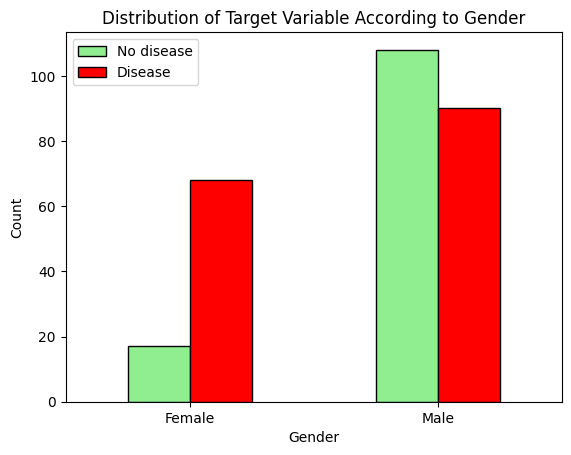

In [ ]:
# Distribusi penyakit jantung terhadap gender
counts = df.groupby(['sex', 'target']).size().unstack(fill_value=0)

# Plot bar
ax = counts.plot(kind='bar', stacked=False, color=['lightgreen', 'red'], edgecolor='black')

# Atur label dan judul
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Target Variable According to Gender')
x_labels = ['Female', 'Male']
plt.xticks(range(len(x_labels)), x_labels, rotation=0, ha='center')
legend_labels = ['No disease','Disease']
plt.legend(legend_labels)

plt.show()

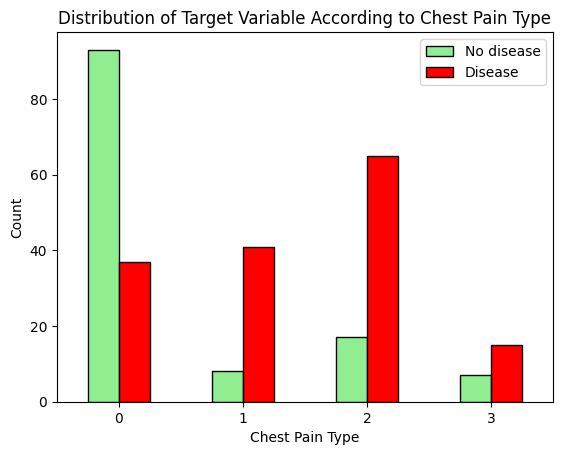

In [ ]:
# Distribusi penyakit jantung terhadap tipe penyakit dada
counts = df.groupby(['cp', 'target']).size().unstack(fill_value=0)

# Plot bar
ax = counts.plot(kind='bar', stacked=False, color=['lightgreen', 'red'], edgecolor='black')

# Atur label dan judul
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Target Variable According to Chest Pain Type')
x_labels = ['0', '1', '2', '3']
plt.xticks(range(len(x_labels)), x_labels, rotation=0, ha='center')
legend_labels = ['No disease', 'Disease']
plt.legend(legend_labels)

plt.show()

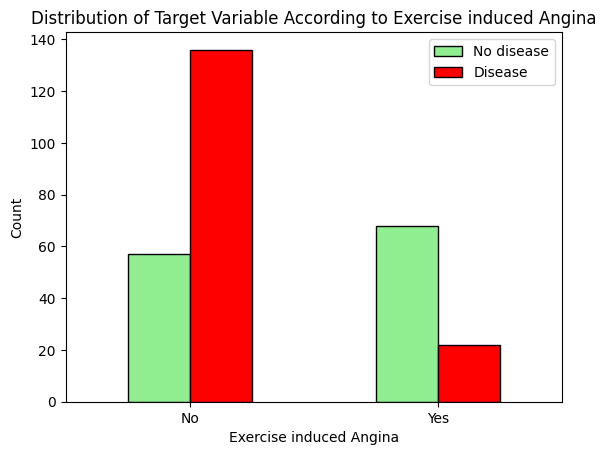

In [ ]:
# Distribusi penyakitjantung terhadap sakit dada akibat olahraga
counts = df.groupby(['exang', 'target']).size().unstack(fill_value=0)

# Plot bar
ax = counts.plot(kind='bar', stacked=False, color=['lightgreen', 'red'], edgecolor='black')

# Atur label dan judul
plt.xlabel('Exercise induced Angina')
plt.ylabel('Count')
plt.title('Distribution of Target Variable According to Exercise induced Angina')
x_labels = ['No','Yes']
plt.xticks(range(len(x_labels)), x_labels, rotation=0, ha='center')
legend_labels = ['No disease', 'Disease']
plt.legend(legend_labels)

plt.show()

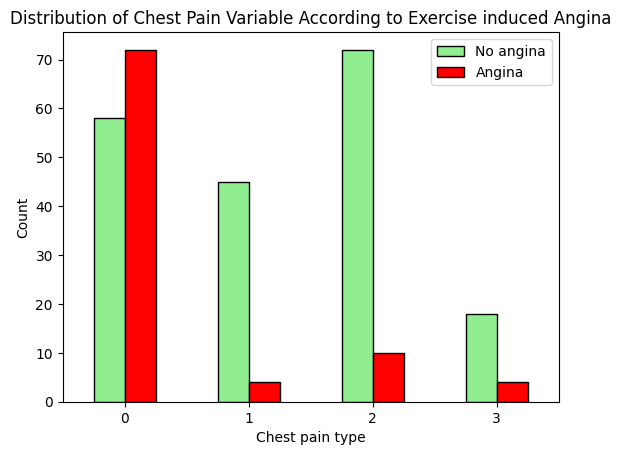

In [ ]:
# Distribusi penyakitjantung terhadap sakit dada akibat olahraga
counts = df.groupby(['cp', 'exang']).size().unstack(fill_value=0)

# Plot bar
ax = counts.plot(kind='bar', stacked=False, color=['lightgreen', 'red'], edgecolor='black')

# Atur label dan judul
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Variable According to Exercise induced Angina')
x_labels = ['0', '1', '2', '3']
plt.xticks(range(len(x_labels)), x_labels, rotation=0, ha='center')
legend_labels = ['No angina', 'Angina']
plt.legend(legend_labels)

plt.show()

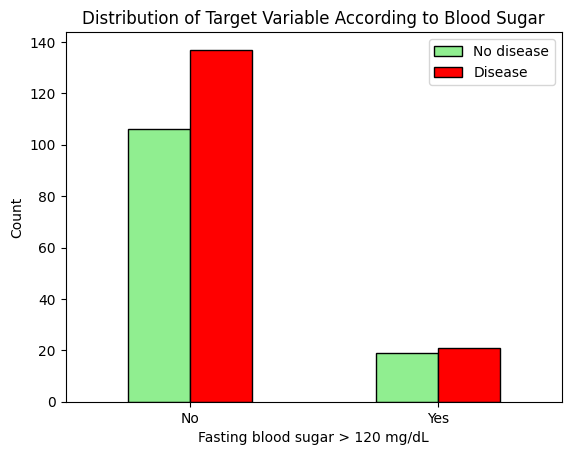

In [ ]:
# Distribusi penyakit jantung terhadap gula darah
counts = df.groupby(['fbs', 'target']).size().unstack(fill_value=0)

# Plot bar
ax = counts.plot(kind='bar', stacked=False, color=['lightgreen', 'red'], edgecolor='black')

# Atur label dan judul
plt.xlabel('Fasting blood sugar > 120 mg/dL')
plt.ylabel('Count')
plt.title('Distribution of Target Variable According to Blood Sugar')
x_labels = ['No','Yes']
plt.xticks(range(len(x_labels)), x_labels, rotation=0, ha='center')
legend_labels = ['No disease', 'Disease']
plt.legend(legend_labels)

plt.show()

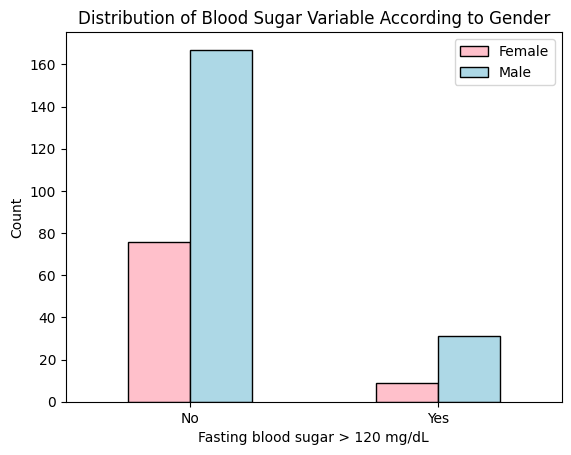

In [ ]:
# Distribusi gula darah terhadap gender
counts = df.groupby(['fbs', 'sex']).size().unstack(fill_value=0)

# Plot bar
ax = counts.plot(kind='bar', stacked=False, color=['pink', 'lightblue'], edgecolor='black')

# Atur label dan judul
plt.xlabel('Fasting blood sugar > 120 mg/dL')
plt.ylabel('Count')
plt.title('Distribution of Blood Sugar Variable According to Gender')
x_labels = ['No','Yes']
plt.xticks(range(len(x_labels)), x_labels, rotation=0, ha='center')
legend_labels = ['Female', 'Male']
plt.legend(legend_labels)

plt.show()

### 3. Feature Engineering

Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membantu bisnis ecommerce dalam menghadapi tantangan bisnis yang ada.
Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

In [ ]:
df_featured=df.copy()
df_featured_scaled=df_scaled.copy()

#### 1. Klasifikasi Umur

In [ ]:
# Fungsi untuk mengklasifikasikan umur
def klasifikasi_umur(umur):
    if umur < 0:
        return "Invalid age"
    elif umur <= 4:
        return "Infant/Toddler"
    elif umur <= 12:
        return "Child"
    elif umur <= 17:
        return "Teenage"
    elif umur <= 24:
        return "Young adult"
    elif umur <= 44:
        return "Adult"
    elif umur <= 64:
        return "Old adult"
    else:
        return "Senior"

# Menambahkan kolom baru ke DataFrame
df_featured['age_category'] = df_featured['age'].apply(klasifikasi_umur)

# Menampilkan DataFrame
df_featured.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,Old adult
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,Old adult
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,Senior
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,Old adult
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,Old adult


In [ ]:
# Deskripsi age category
df_featured['age_category'].describe()

count           283
unique            3
top       Old adult
freq            192
Name: age_category, dtype: object

Mayoritas pasien pada data adalah old adult sebanyak 192 orang.

#### 2. Klasifikasi Tekanan Darah

Sumber: [Blood Pressure Classifications](https://www.ncbi.nlm.nih.gov/books/NBK570233/table/ch1.tab1/)

In [ ]:
# Fungsi untuk mengklasifikasikan tekanan darah
def klasifikasi_td(td):
    if td < 0:
        return 'Tidak valid'
    elif td <= 120:
        return 'Normal'
    elif td < 140:
        return 'Prehypertension'
    elif td < 160:
        return 'Stage 1 hypertension'
    else:
        return 'Stage 2 hypertension'

# Menambahkan kolom baru ke DataFrame
df_featured['bps_category'] = df_featured['trestbps'].apply(klasifikasi_td)

# Menampilkan DataFrame
df_featured.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,bps_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,Old adult,Prehypertension
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,Old adult,Stage 1 hypertension
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,Senior,Stage 1 hypertension
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,Old adult,Stage 1 hypertension
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,Old adult,Prehypertension


In [ ]:
# Deskripsi bps category
df_featured['bps_category'].describe()

count                 283
unique                  4
top       Prehypertension
freq                  107
Name: bps_category, dtype: object

Mayoritas pasien pada data memiliki tekanan darah prehypertension sebanyak 107 orang.

#### 3. Klasifikasi Kolesterol

Sumber : [Cholesterol Levels](https://medlineplus.gov/lab-tests/cholesterol-levels/#:~:text=There%20are%20two%20main%20types,disease%20and%20other%20heart%20diseases.)

In [ ]:
# Fungsi untuk mengklasifikasikan tekanan darah
def klasifikasi_chol(chol):
    if chol < 0:
        return 'Tidak valid'
    elif chol < 200:
        return 'Desirable'
    elif chol < 239:
        return 'Borderline High'
    else:
        return 'High'

# Menambahkan kolom baru ke DataFrame
df_featured['chol_category'] = df_featured['chol'].apply(klasifikasi_chol)

# Menampilkan DataFrame
df_featured.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,bps_category,chol_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,Old adult,Prehypertension,Borderline High
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,Senior,Stage 1 hypertension,Desirable
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,Old adult,Prehypertension,High


#### 4. Klasifikasi Jenis Penyakit Dada

In [ ]:
# Fungsi untuk mengklasifikasikan chest pain
def klasifikasi_cp(cp):
    if cp < 0:
        return 'Tidak valid'
    elif cp == 1:
        return 'Typical angina'
    elif cp == 2:
        return 'Atypical angina'
    elif cp == 3:
        return 'Non-anginal pain'
    else:
        return 'Asymptomatic'

# Menambahkan kolom baru ke DataFrame
df_featured['cp_category'] = df_featured['cp'].apply(klasifikasi_cp)

# Menampilkan DataFrame
df_featured.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,bps_category,chol_category,cp_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,Old adult,Prehypertension,Borderline High,Asymptomatic
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,Senior,Stage 1 hypertension,Desirable,Asymptomatic
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,Old adult,Prehypertension,High,Asymptomatic


In [ ]:
# Deskripsi chol category
df_featured['chol_category'].describe()

count      283
unique       3
top       High
freq       145
Name: chol_category, dtype: object

Mayoritas pasien pada data memiliki kolesterol tinggi sebanyak 145 orang.

#### 5. Disease_exang

Korelasi exang dan target bernilai negatif. Artinya, kemungkinan terdapat hubungan antara seseorang yang tidak merasakan sakit dada akibat olahraga, tetapi mengidap penyakit jantung. Akan dibentuk feature ’disease_exang’ yaitu iya atau tidaknya seseorang yang tidak sakit dada akibat olahraga, memiliki penyakit jantung (0 = tidak, 1 = iya)

In [ ]:
df_disease_a = df_featured.copy()

df_disease_a['disease_exang'] = ((df_disease_a['exang'] == 0) & (df_disease_a['target'] == 1)).astype(int).astype(object)
df_disease_a.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,bps_category,chol_category,cp_category,disease_exang
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,Old adult,Prehypertension,Borderline High,Asymptomatic,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,Senior,Stage 1 hypertension,Desirable,Asymptomatic,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,Old adult,Prehypertension,High,Asymptomatic,0


In [ ]:
df_disease_a.describe(include=object)

,age_category,bps_category,chol_category,cp_category,disease_exang
count,283,283,283,283,283
unique,3,4,3,4,2
top,Old adult,Prehypertension,High,Asymptomatic,0
freq,192,107,145,130,147


Banyak pasien yang tidak merasakan sakit dada akibat olahraga tetapi mengidap penyakit jantung adalah 136 orang

#### 6. Cp_exang

Membuat variabel baru (cpang) yang menggabungkan jenis nyeri dada dan angina akibat olahraga untuk melihat apakah kombinasi tertentu lebih mengindikasikan penyakit jantung.

In [ ]:
cpang = []
for index, row in df_featured.iterrows():
  if row['exang'] == 1:
    disease_combine1 = row['cp_category'] + ' dan angina olahraga'
    cpang.append(disease_combine1)
  else:
    disease_combine = row['cp_category']
    cpang.append(disease_combine)

df_disease_b=df_featured.copy()
df_disease_b['cpang'] = cpang
df_disease_b.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,bps_category,chol_category,cp_category,cpang
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,Old adult,Prehypertension,Borderline High,Asymptomatic,Asymptomatic
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,Asymptomatic dan angina olahraga
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,Senior,Stage 1 hypertension,Desirable,Asymptomatic,Asymptomatic dan angina olahraga
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,Asymptomatic
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,Old adult,Prehypertension,High,Asymptomatic,Asymptomatic


In [ ]:
df_disease_b.describe(include=object)

,age_category,bps_category,chol_category,cp_category,cpang
count,283,283,283,283,283
unique,3,4,3,4,8
top,Old adult,Prehypertension,High,Asymptomatic,Asymptomatic dan angina olahraga
freq,192,107,145,130,72


#### 7. Target Heart Rate and Estimated Maximum Heart Rate


Menghitung perkiraan detak jantung maksimum berdasarkan usia (hrt) dan melihat perbandingannya dengan detak jantung maksimum yang dicapai.

Sumber: [Target Heart Rate](https://www.cdc.gov/physicalactivity/basics/measuring/heartrate.htm#:~:text=To%20estimate%20your%20maximum%20age,x%200.64%20%3D%20109%20bpm%2C%20and)

In [ ]:
perkiraan_hitung = []

def perkiraan_detak_jantung(usia):
    for index, row in df_featured.iterrows():
        perkiraan = 220 - row[usia]
        perkiraan_hitung.append(perkiraan)

perkiraan_detak_jantung('age')

df_disease_c = df_featured.copy()
df_disease_c['hrt'] = perkiraan_hitung
df_disease_c.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,bps_category,chol_category,cp_category,hrt
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,Old adult,Prehypertension,Borderline High,Asymptomatic,168
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,167
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,Senior,Stage 1 hypertension,Desirable,Asymptomatic,150
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,159
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,Old adult,Prehypertension,High,Asymptomatic,158


#### 8. Klasifikasi perbandingan hrt dengan thalach (kecepatan jantung maks)

Klasifikasi:\
0 = Similar\
1 = Lower\
2 = Higher

In [ ]:
comparison = []
for index, row in df_disease_c.iterrows():
  if row['thalach'] > row['hrt']:
    compare = 2
  elif row['thalach'] < row['hrt']:
    compare = 1
  else:
    compare = 0
  comparison.append(compare)

df_disease_c['compare_hrt_thalach'] = comparison
df_disease_c.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,bps_category,chol_category,cp_category,hrt,compare_hrt_thalach
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,Old adult,Prehypertension,Borderline High,Asymptomatic,168,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,167,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,Senior,Stage 1 hypertension,Desirable,Asymptomatic,150,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,159,2
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,Old adult,Prehypertension,High,Asymptomatic,158,1


#### 8a. Hubungan antara compare_hrt_thalach dengan target

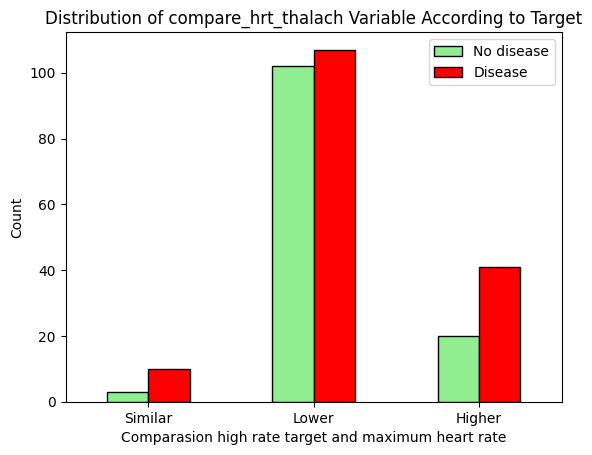

In [ ]:
counts = df_disease_c.groupby(['compare_hrt_thalach', 'target']).size().unstack(fill_value=0)

ax = counts.plot(kind='bar', stacked=False, color=['lightgreen', 'red'], edgecolor='black')
plt.xlabel('Comparasion high rate target and maximum heart rate')
plt.ylabel('Count')
plt.title('Distribution of compare_hrt_thalach Variable According to Target')
x_labels = ['Similar', 'Lower', 'Higher']
plt.xticks(range(len(x_labels)), x_labels, rotation=0, ha='center')
legend_labels = ['No disease', 'Disease']
plt.legend(legend_labels)

plt.show()

Banyak pasien yang detak jantung maksimalnya lebih rendah daripada target detak jantung, memiliki resiko penyakit jantung yang lebih banyak daripada pasian yang detak jantung maksimalnya lebih tinggi atau sama dengan target detak jantung.

#### 9. Disease_fbs

Dari distribusi penyakit jantung terhadap gula darah, terdapat pasien yang memiliki penyakit jantung dengan gula darah normal (di bawah 120 mg/dL). Akan dibuat feature 'target_risk_fbs' yaitu iya atau tidaknya seseorang yang memiliki gula darah < 120 mg/dL, tetapi memiliki penyakit jantung (0 = tidak, 1 = iya)

In [ ]:
df_disease_e = df_featured.copy()

df_disease_e['disease_fbs'] = ((df_disease_e['fbs'] == 0) & (df_disease_e['target'] == 1)).astype(int).astype(object)
df_disease_e.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,bps_category,chol_category,cp_category,disease_fbs
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,Old adult,Prehypertension,Borderline High,Asymptomatic,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,Senior,Stage 1 hypertension,Desirable,Asymptomatic,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,Old adult,Stage 1 hypertension,Borderline High,Asymptomatic,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0,Old adult,Prehypertension,High,Asymptomatic,0


In [ ]:
df_disease_e.describe(include=object)

,age_category,bps_category,chol_category,cp_category,disease_fbs
count,283,283,283,283,283
unique,3,4,3,4,2
top,Old adult,Prehypertension,High,Asymptomatic,0
freq,192,107,145,130,146


Banyak pasien yang memiliki gula darah < 120 mg/dL tetapi mengidap penyakit jantung adalah 137 orang.

#### 10. Resiko penyakit jantung yang diakibatkan kolesterol dan tekanan darah

In [ ]:
scored = []
for index, row in df_featured_scaled.iterrows():
    score = row['trestbps'] + row['chol']
    scored.append(score)

df_disease_f=df_featured_scaled.copy()
df_disease_f['score_risk'] = scored
df_disease_f.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,score_risk
0,0.479167,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,2,0.666667,3.0,0,0.775416
1,0.500000,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0,0.000000,3.0,0,0.934323
2,0.854167,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0,0.000000,3.0,0,0.876181
3,0.666667,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,2,0.333333,3.0,0,1.039586
4,0.687500,0,0,0.578947,0.717949,1,1,0.157895,0,0.475,1,1.000000,2.0,0,1.296896


In [ ]:
df_disease_f['score_risk'].describe()

count    283.000000
mean       0.969220
std        0.293782
min        0.248313
25%        0.777890
50%        0.961089
75%        1.173133
max        1.868421
Name: score_risk, dtype: float64

* Nilai skor terendah: 0.248313
* Nilai skor tertinggi: 1.868421

Semakin tinggi nilai skor, semakin tinggi resiko penyakit kolesterol dan tekanan darah. Semakin tinggi resiko, maka semakin tinggi resiko penyakit jantung.

Sumber: [Kolesterol Tinggi dan Darah Tinggi Berbahaya Jika Disatukan](https://www.halodoc.com/artikel/kolesterol-tinggi-dan-darah-tinggi-berbahaya-jika-disatukan)

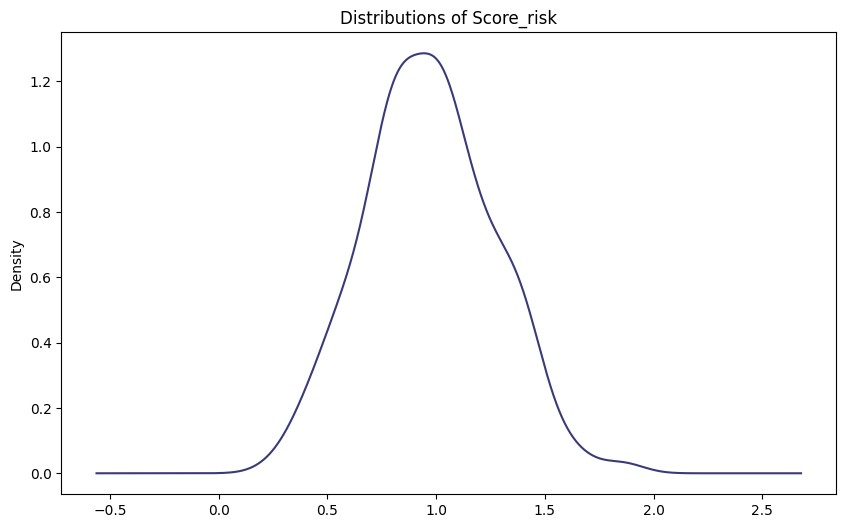

In [ ]:
# Distribusi score risk
df_disease_f['score_risk'].plot(
    title = 'Distributions of Score_risk',
    kind = 'density',
    layout = (2,3),
    sharex = False,
    ylabel = False,
    figsize = (10, 6),
    colormap = 'tab20b')
plt.show()

Skor resiko berdasarkan trestbps dan chol berdistribusi normal, dengan rata-rata skor 0.969220